Project 1:

**What is your issue of interest (provide sufficient background information)?**

I have always been facinated by healthcare datasets. Mainly because I have had a bad history with my health. I have always wondered as to how many people like me struggled to get proper care. I come from India, even though there are a lot of good doctors, the facilities are just not enough and we end up coming abroad to fix our health. I have seen many Indian doctors working here and they suggest that the healthcare is better here so whenevr I get a change to work on a project, I always choose healthcare datastes, its just very personal and I like to draw conclusions from them. It just makes me learn more and more about the facilities that are available here.

**Why is this issue important to you and/or to others?**

It is important to me as this is a very personal matter but it is equally important to any other person as they should know if there are enough facilities in a develop country like united states. We always look up to this coutry and if the analysis is available to public they would know where the country stand.


**What questions do you have in mind and would like to answer?**

There are more number of nursing facilities in the city that has more population than the rest that are not so populated 
Question:Distribution of ages, how many patients are less than the age of 35?
What is the percentage of people who pay through the tradional method when compared to the no insurance method? 

**Where do you get the data to help answer your questions?**

I went online on a lot of websits to seach for the datasets, I did not want to take the entire United States as it would be very large and hard to find and do analysis. So I chose a state.
Data Source1: https://www.connecticut-demographics.com/cities_by_population
The data is from the US Census. Below are 178 Connecticut cities ranked 1 through 176. You can copy and paste this list directly into your favorite spreadsheet program

Data Source2:https://catalog.data.gov/dataset/nursing-facility-re gistry
Public: This dataset is intended for public access and use.
Non-Federal: This dataset is covered by different Terms of Use than Data.gov.
 License: No license information was provided.
 
**What will be your unit of analysis (for example, patient, organization, or country)? Roughly how many units (observations) do you expect to analyze**

My main focus will be on distribution of age, wha method of insurance they use and how many facilities are available in an area. I will be using 6 or more variables for my analysis

**What variables/measures do you plan to use in your analysis (variables should be tied to the questions in #3)?**


I will be using 6 variables or more and my technique is to combine datasets as they are available in different forms and plotting them in various graphs.

**What kinds of techniques do you plan to use (for example, summary statistics, scatter plot, bar chart, chi-squared test)?**


Bar graphs and pie chat would help me form my analysis and find answers to my questions.


Let's import Libarires

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns; sns.set()
import datetime as dt
import time

Let's read the files

In [2]:
df1 = pd.read_excel('Medical Records.xlsx', sheetname='23')

C:\ProgramData\Anaconda3\lib\site-packages\pandas\util\_decorators.py:188: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  return func(*args, **kwargs)


In [3]:
df2 = pd.read_excel('Population.xlsx', sheetname='Sheet1')

Now that we have both the datsets, let's combine them in one so we have a picture of what we are dealing with

In [4]:
bigdata = df2.append(df1, ignore_index=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


Let's explore the data by printing describe, shape, columns. This will help us have a better idea of what does it contain

In [5]:
bigdata.columns

Index(['18 - 24', '25 - 34', '35 - 44', '45 - 54', '55 - 64', '65 - 74',
       '75 - 84', '85 - 94', '95 and older', '<18', 'African American',
       'American Indian or Alaskan Native', 'Asian or Pacific Islander',
       'CCNH Room Rate: 3 - 4 BEDS', 'CCNH Room Rate: PRIVATE (1 BED)',
       'CCNH Room Rate: SEMI-PRIVATE (2 BEDS)', 'CCRC -- Life Care', 'COUNTY',
       'City', 'County ', 'Divorced', 'FACILITY NAME', 'FACILITY TELEPHONE',
       'Female', 'Hispanic or Latino Origin', 'Level of Care',
       'Licensed CCNH Beds', 'Licensed CCNH Beds Occupied',
       'Licensed RHNS Beds', 'Licensed RHNS Beds Occupied', 'Location 1',
       'Long-Term care insurance -- Not CT Partnership',
       'Long-term care insurance --  CT Partnership for Long-Term Care',
       'MEDICAID CERTIFIED', 'MEDICARE CERTIFIED', 'Male', 'Married',
       'Medicaid fee-for-service -- CT',
       'Medicaid fee-for-service -- Out of state',
       'Medicaid managed care -- Out of state', 'Medicaid pending

In [6]:
bigdata.shape

(868, 71)

The second step after our dataset is to see how many null values it has. It is very important to have a clean dataset in order to work with it.

In [7]:
bigdata.isnull().any()

18 - 24                                   True
25 - 34                                   True
35 - 44                                   True
45 - 54                                   True
55 - 64                                   True
65 - 74                                   True
75 - 84                                   True
85 - 94                                   True
95 and older                              True
<18                                       True
African American                          True
American Indian or Alaskan Native         True
Asian or Pacific Islander                 True
CCNH Room Rate: 3 - 4 BEDS                True
CCNH Room Rate: PRIVATE (1 BED)           True
CCNH Room Rate: SEMI-PRIVATE (2 BEDS)     True
CCRC -- Life Care                         True
COUNTY                                    True
City                                      True
County                                    True
Divorced                                  True
FACILITY NAME

It looks like there are a lot of NAN values, it is not a right way to drop all the columns. The better way would be to just add zero wherever it is needed so we can start analysing the data.

In [8]:
df1= df1.fillna(0)
df1.isnull().sum()

Level of Care                                                     0
FACILITY NAME                                                     0
FACILITY TELEPHONE                                                0
TOWN                                                              0
COUNTY                                                            0
OWNERSHIP TYPE                                                    0
MEDICARE CERTIFIED                                                0
MEDICAID CERTIFIED                                                0
Total Licensed Beds                                               0
Licensed CCNH Beds                                                0
Licensed CCNH Beds Occupied                                       0
Licensed RHNS Beds                                                0
Licensed RHNS Beds Occupied                                       0
CCNH Room Rate: PRIVATE (1 BED)                                   0
CCNH Room Rate: SEMI-PRIVATE (2 BEDS)           

**Question1: What is the percentage of people who pay through the tradional method when compared to the no insurance method?**
Lets check first how many people use traditional method in the town. 
When I first came to United States , Insurance was a big deal. I used to pay overr 900 dollars for a year which was a huge deal so I wondered how everyone else did it. I always heard that you need insurance and for a while I never thought that there is certain population that just cannot afford it. Quiet facinating to see how they do it .
Here I am using groupby to combine town and the tradional insurance method to see the data for each town

In [9]:
bigdata.groupby('TOWN')['Medicare fee-for-service (traditional)'].sum()

TOWN
Avon                 53.0
Bethel              170.0
Bloomfield          119.0
Branford             69.0
Bridgeport          134.0
Bristol             127.0
Brooklyn             16.0
Canaan               13.0
Cheshire             75.0
Chester              34.0
Cobalt               11.0
Colchester           95.0
Collinsville         30.0
Cromwell             76.0
Danbury             196.0
Danielson            39.0
Dayville             72.0
Derby                20.0
Durham                1.0
East Hartford        92.0
East Haven           66.0
East Windsor         27.0
Enfield              81.0
Essex                19.0
Fairfield           281.0
Farmington           51.0
Forestville          31.0
Glastonbury         152.0
Granby               38.0
Greenwich           206.0
                    ...  
Shelton             138.0
Simsbury             87.0
South Windsor        19.0
Southbury           132.0
Southington          73.0
Southport            54.0
Stafford Springs     58.0
Stamfor

Text(0.5, 1.0, 'Traditional Method')

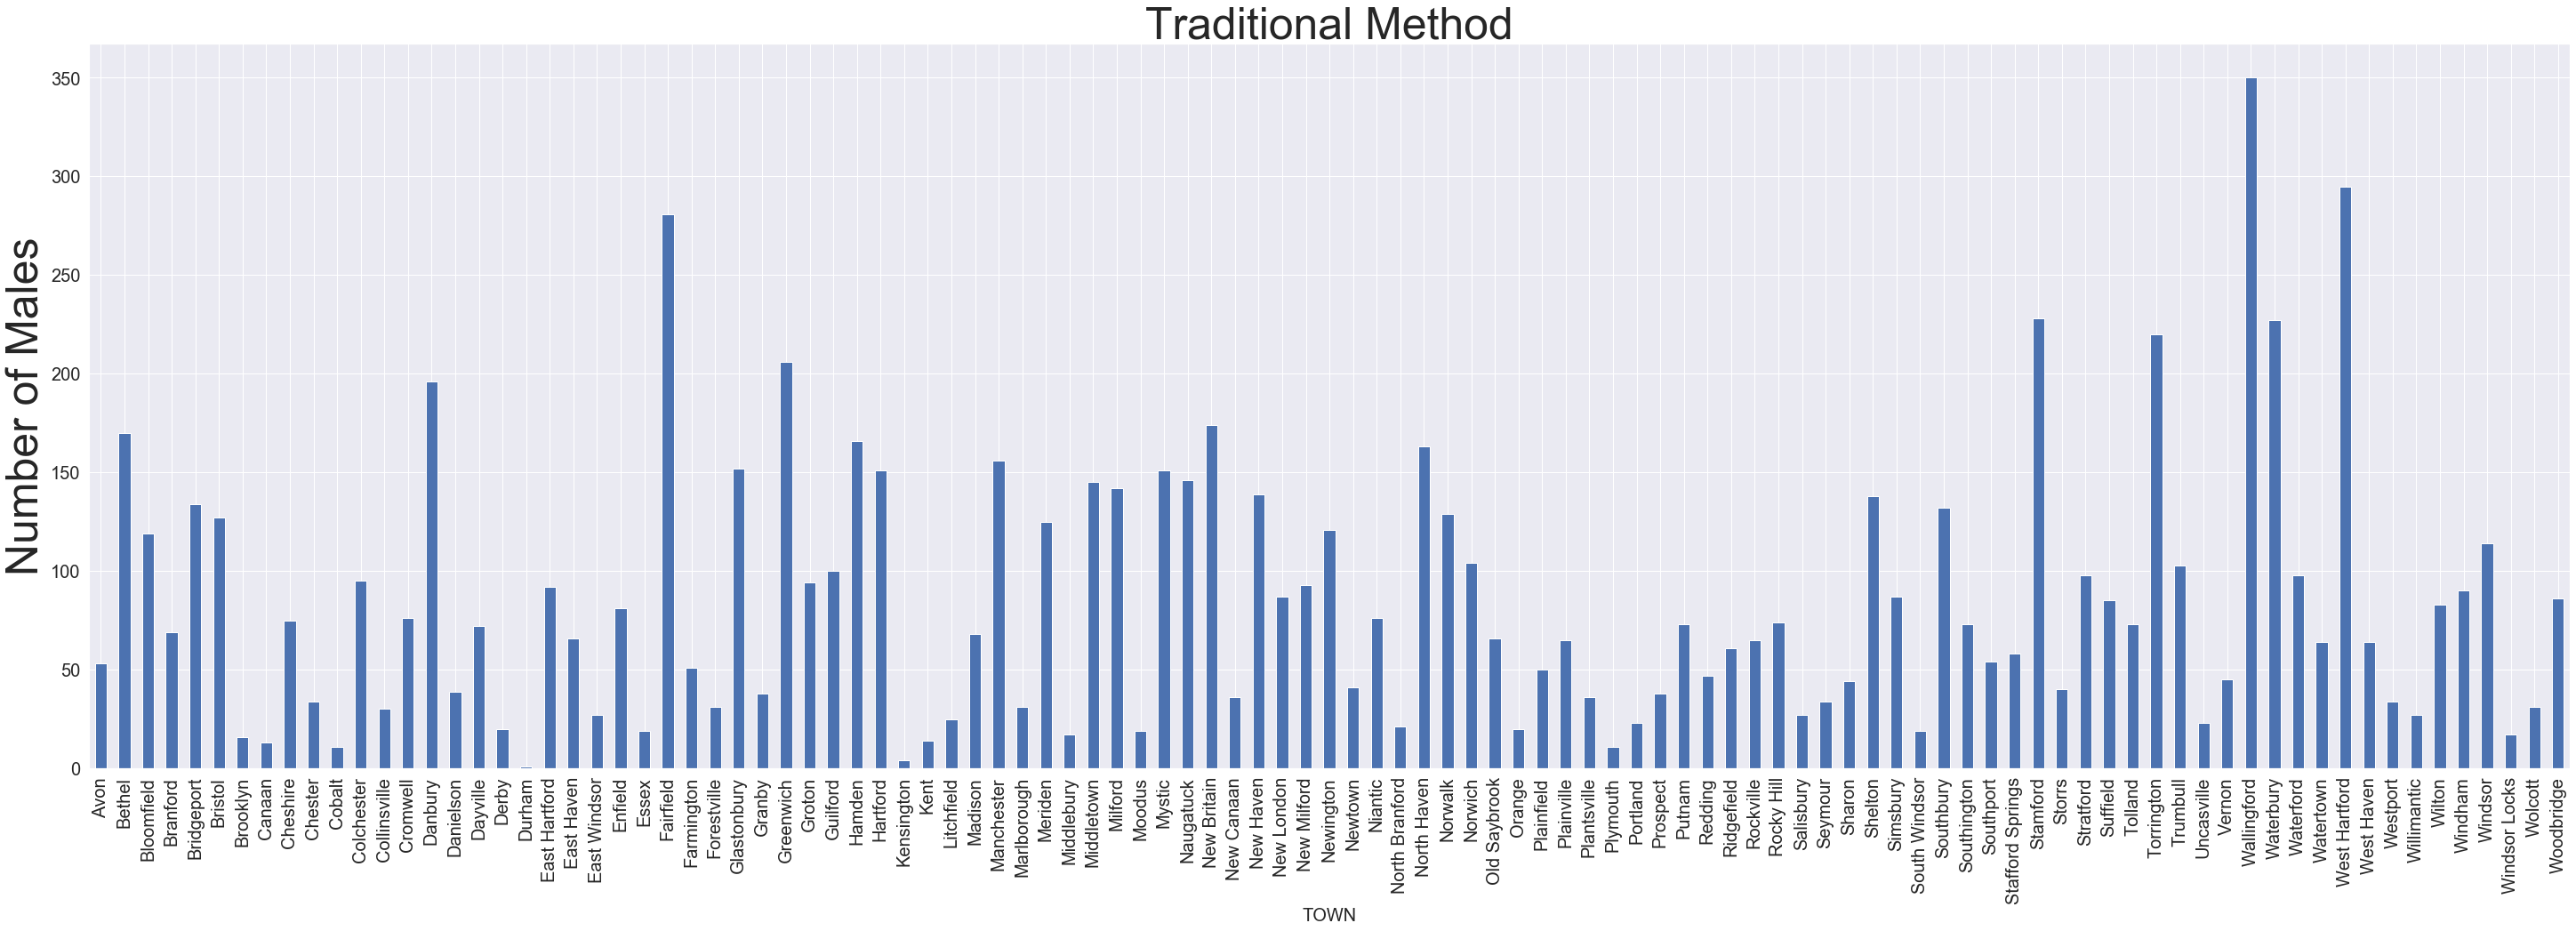

In [10]:
bigdata.groupby('TOWN')['Medicare fee-for-service (traditional)'].sum().plot(kind='bar',figsize=(50, 15), fontsize=20)
plt.xlabel('TOWN', fontsize=20)
plt.ylabel('Number of Males', fontsize=50)
plt.title('Traditional Method', fontsize=50)

Let's also see how many of them use private pay

In [11]:
bigdata.groupby('TOWN')['Private pay (no insurance)'].sum()

TOWN
Avon                 87.0
Bethel               28.0
Bloomfield          112.0
Branford             46.0
Bridgeport           42.0
Bristol             119.0
Brooklyn             17.0
Canaan               64.0
Cheshire             25.0
Chester              48.0
Cobalt               24.0
Colchester           53.0
Collinsville         34.0
Cromwell             73.0
Danbury             108.0
Danielson            13.0
Dayville             76.0
Derby                22.0
Durham               13.0
East Hartford        40.0
East Haven           32.0
East Windsor         18.0
Enfield              69.0
Essex                27.0
Fairfield           362.0
Farmington           40.0
Forestville           8.0
Glastonbury          69.0
Granby               31.0
Greenwich           183.0
                    ...  
Shelton              89.0
Simsbury             59.0
South Windsor         7.0
Southbury           115.0
Southington          78.0
Southport            12.0
Stafford Springs     51.0
Stamfor

Text(0.5, 1.0, 'No insurance Method')

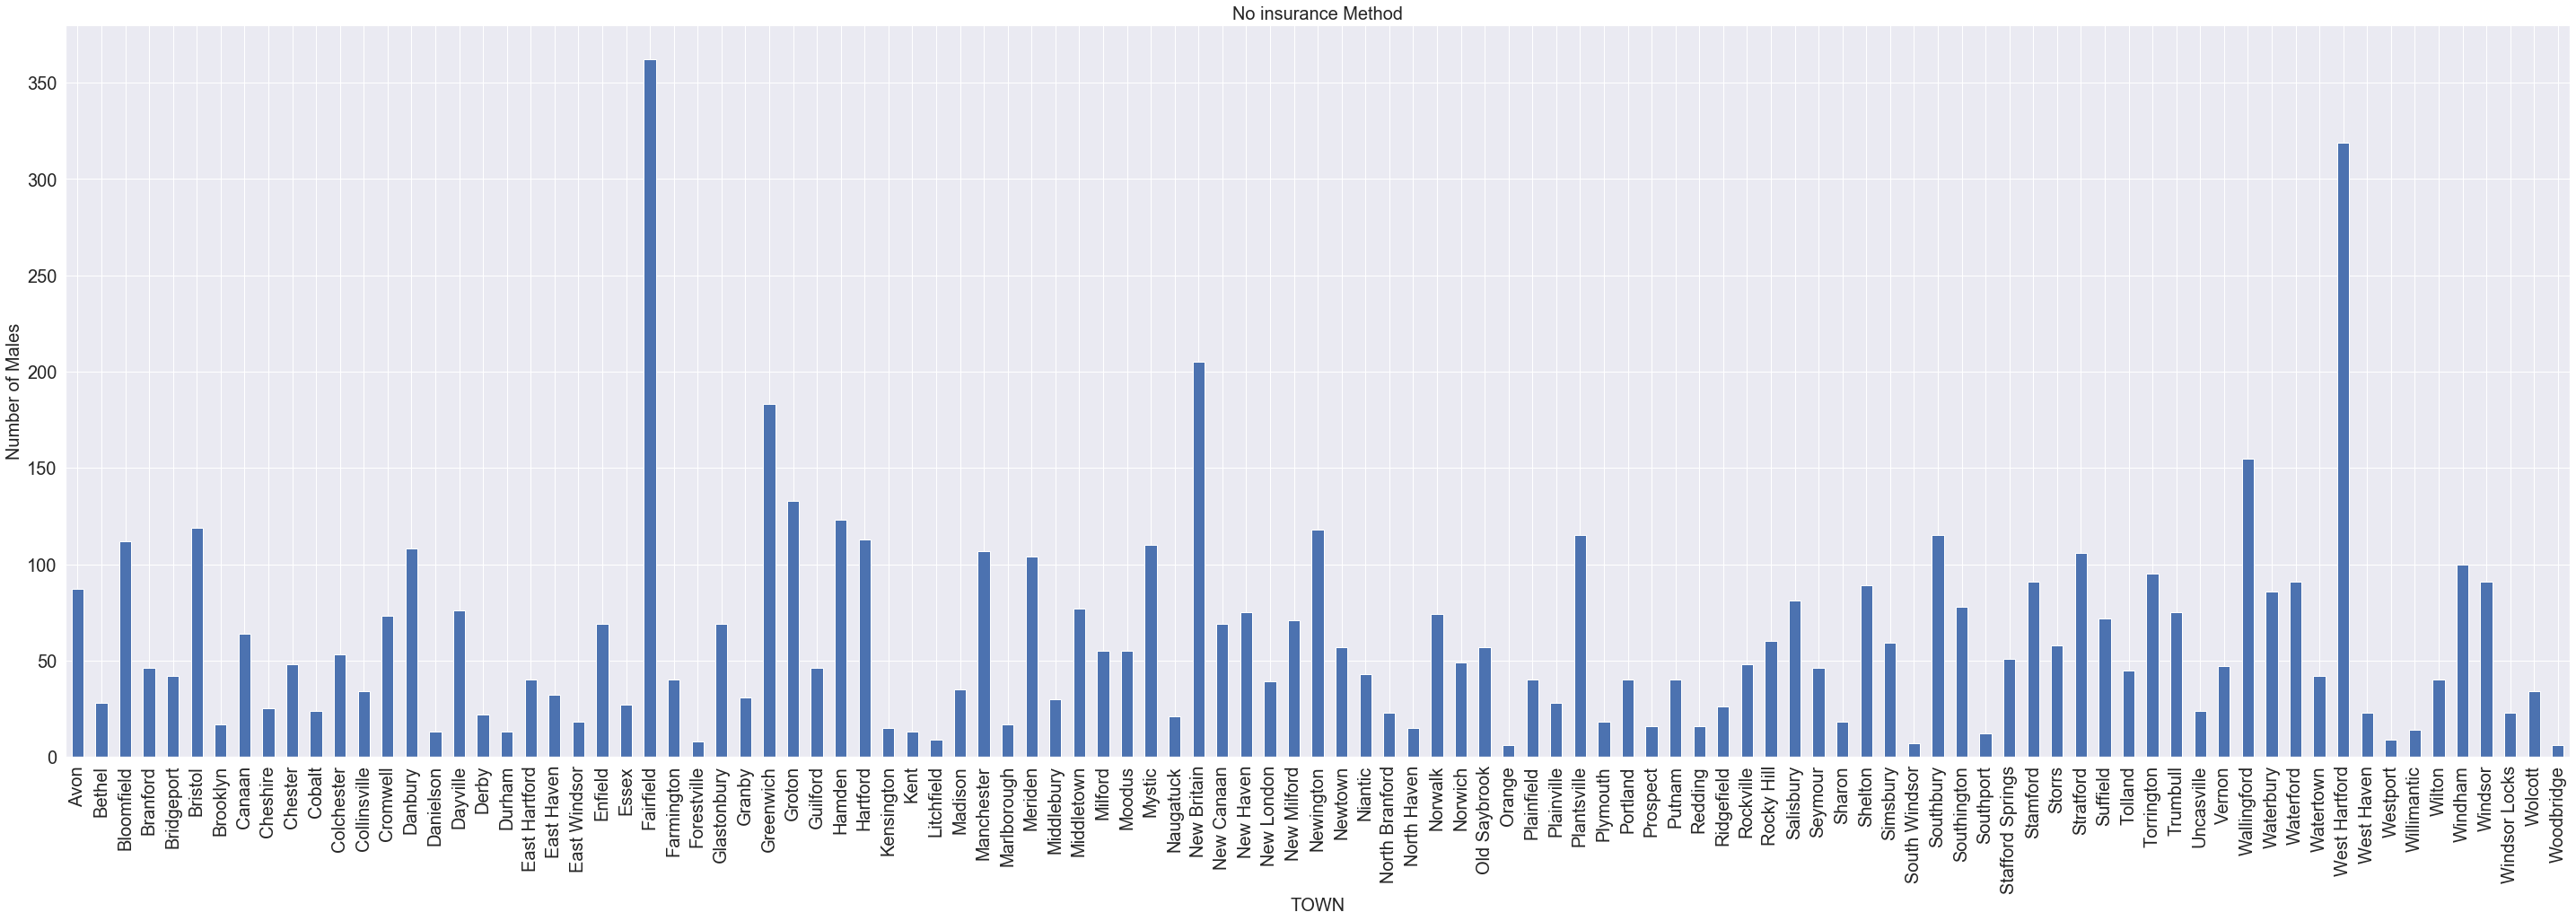

In [12]:
bigdata.groupby('TOWN')['Private pay (no insurance)'].sum().plot(kind='bar',figsize=(50, 15), fontsize=20)
plt.xlabel('TOWN', fontsize=20)
plt.ylabel('Number of Males', fontsize=20)
plt.title('No insurance Method', fontsize=20)

In order to compare what percentage of people use what type of insurance, we have a column for both named Percentage of traditional insurance and Percentage of private insurance. If we calculate the sum and put it in a pie chat , we will be able to see what percentage of people prefer which type of method 

In [13]:
Total = df1['Percentage of traditional insurance'].sum()
print (Total)

7968.652228612172


In [14]:
Total = df1['Percentage of private insurance '].sum()
print (Total)

14106.604482257


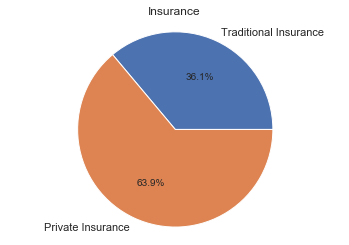

In [15]:
Total = [7968.6522,14106.6044]
my_labels = 'Traditional Insurance','Private Insurance'
plt.pie(Total,labels=my_labels,autopct='%1.1f%%')
plt.title('Insurance')
plt.axis('equal')
plt.show()

Traditional insurance policy plans provide the sum assured and a guaranteed or a vested bonus at maturity. These plans take a limited exposure in high risk equity and hence the downside probability is also low. These plans are suitable for the purpose of tax planning.
The word "private" is used to describe any health insurance plan that is not run by the federal or state government.All private health insurance plans are designed to split the cost between you and the insurer, making medical care more affordable for you.
By defination it does seem like traditional method is a better option but then why is that people use private insurance methods?
After my reseach I found that  some people purchase private health insurance because they want more control over their health care, choice about the services they use and choice of doctor. If they take out private health insurance after turning 31*, they pay an extra 2% for every year delay.

**Question 2: Distribution of ages, how many patients are less than the age of 35? This would help me see as to how many people below 35 are using insurance. I always used to believe that everyone needs to have insurance but this dataset proved me wrong.**

lets first calculate the total number of people in the entire column 

In [16]:
Total = df1['<18'].sum()
print (Total)

1


In [17]:
Total = df1['18 - 24'].sum()
print (Total)

41


In [18]:
Total = df1['25 - 34'].sum()
print (Total)

189


That's all. Now look at the number rise from here

In [19]:
Total = df1['35 - 44'].sum()
print (Total)

554


In [20]:
Total = df1['45 - 54'].sum()
print (Total)

2359


In [21]:
Total = df1['55 - 64'].sum()
print (Total)

6521


In [22]:
Total = df1['65 - 74'].sum()
print (Total)

10305


In [23]:
Total = df1['75 - 84'].sum()
print (Total)

18133


In [24]:
Total = df1['85 - 94'].sum()
print (Total)

27331


In [25]:
Total = df1['95 and older'].sum()
print (Total)

7525


Isn't it strange. This dataset makes me wonder that I am 24, do I need insurance? Its funny.

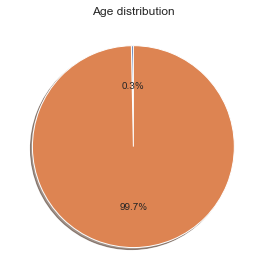

In [26]:
Age= [231,72728]
my_labels = 'less than 35','35 and older'
plt.pie(Age, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.title('Age distribution')
plt.tight_layout()
plt.show()

There are more number of nursing facilities in the city that has more population than the rest that are not so populated. Lets start with grouping the county and the number of facilities in that particular county. This is what I first thought when I saw the dataframe and it does seem right. It is common sense that they need to be more facilities in areas where there is more population, you need hospitals. Let's find out.

In [27]:
bigdata.groupby('Name of the county ')['Number of facilities in each county '].sum()

Name of the county 
Fairfield     125.0
HartFord      194.0
Litchfield     44.0
Middlesex      47.0
New Haven     181.0
New London     53.0
Tolland        14.0
Windham        29.0
Name: Number of facilities in each county , dtype: float64

Text(0.5, 1.0, 'Number of facilities in each county')

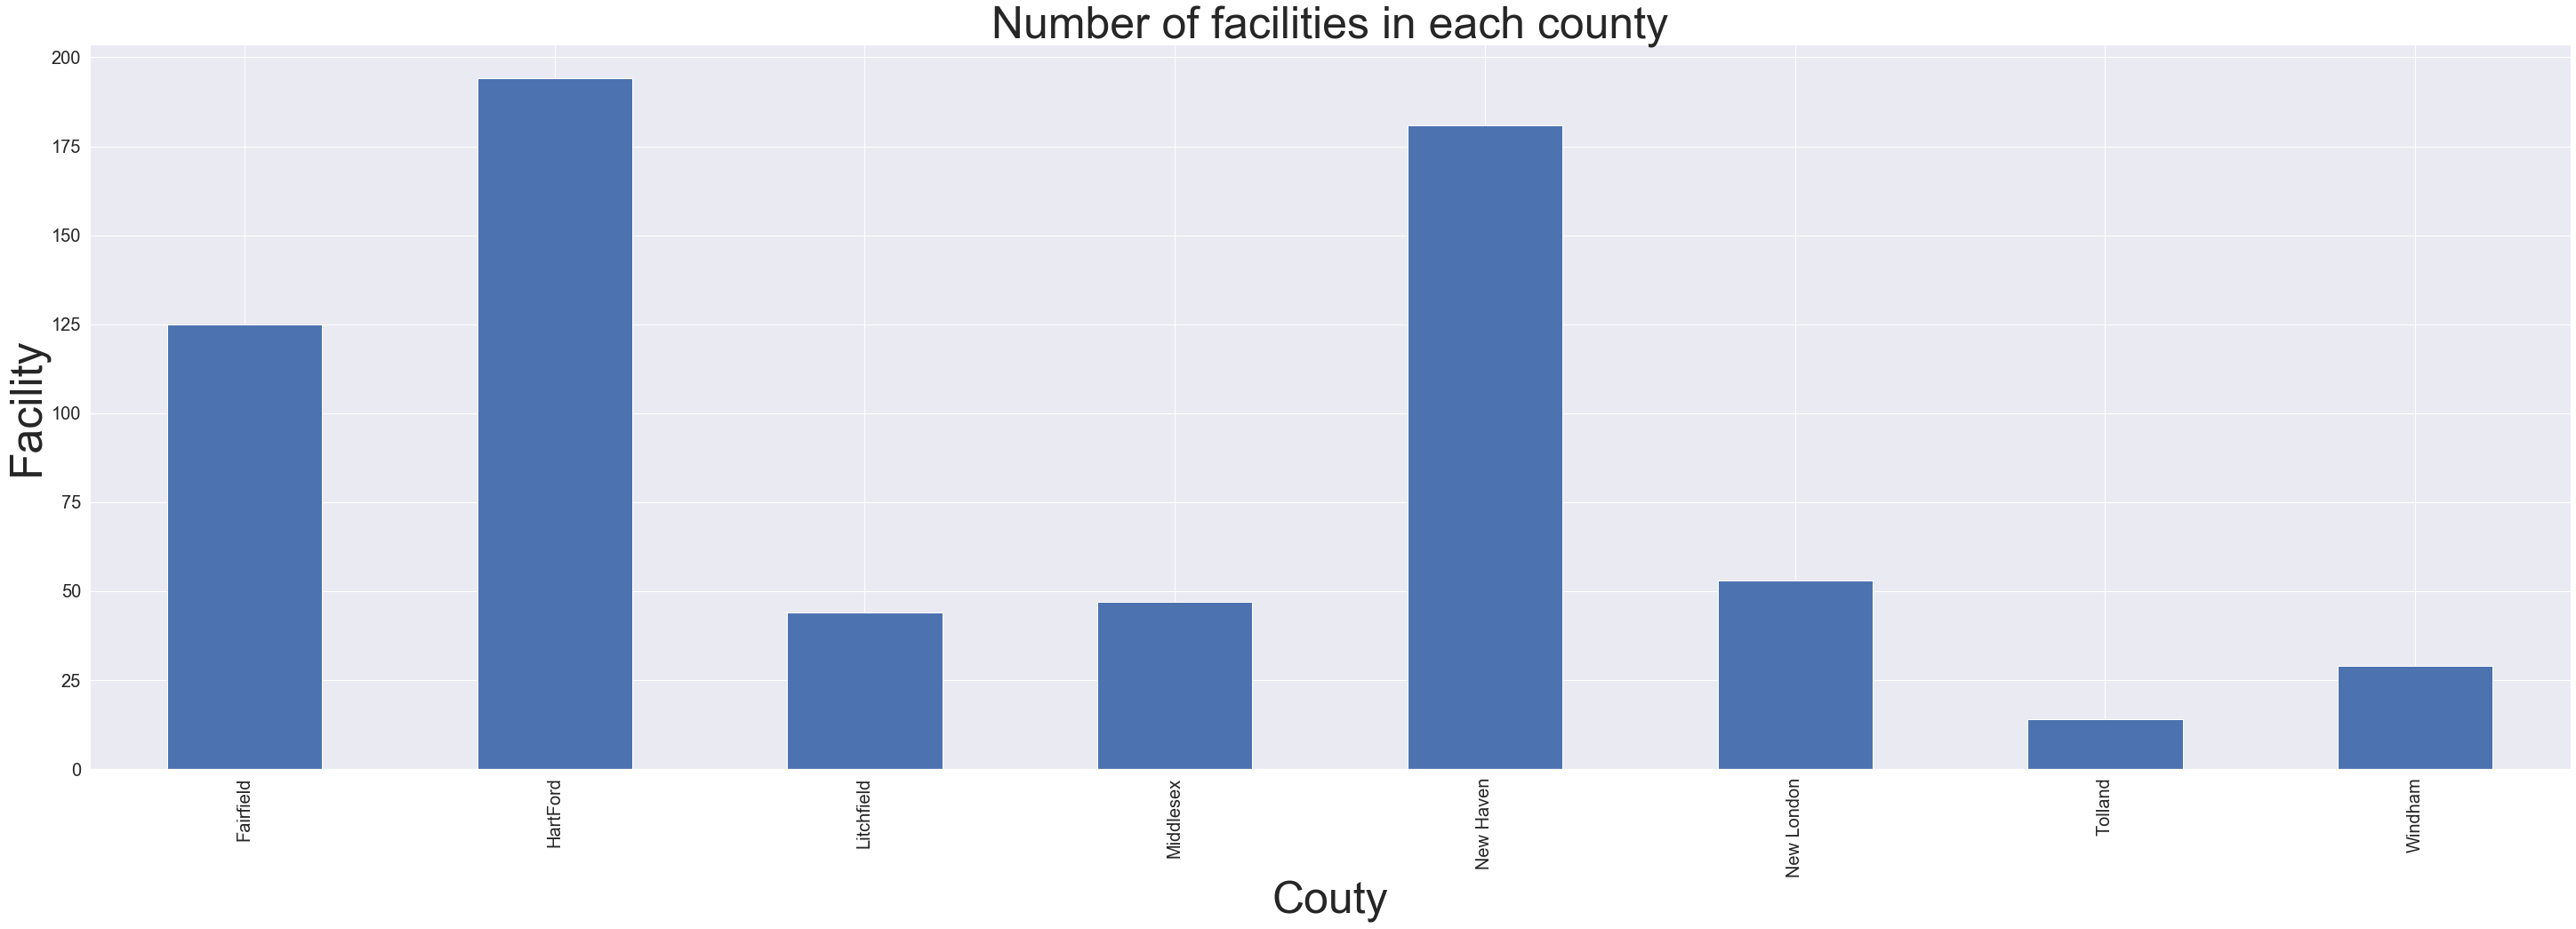

In [28]:
bigdata.groupby('Name of the county ')['Number of facilities in each county '].sum().plot(kind='bar',figsize=(50, 15), fontsize=20)
plt.xlabel('Couty', fontsize=50)
plt.ylabel('Facility', fontsize=50)
plt.title('Number of facilities in each county', fontsize=50)

let's combine the city and population to draw the analysis 

In [29]:
bigdata.groupby('City')['Population'].sum()

City
Andover            3231.0
Ansonia           18721.0
Ashford            4261.0
Avon              18302.0
Bantam              727.0
Barkhamsted        3624.0
Beacon Falls       6182.0
Berlin            20432.0
Bethany            5479.0
Bethel            19714.0
Bethlehem          3422.0
Bloomfield        21301.0
Bolton             4890.0
Bozrah             2537.0
Branford          28005.0
Bridgeport       144900.0
Bridgewater        1641.0
Bristol           60032.0
Brookfield        17002.0
Brooklyn           8280.0
Burlington         9665.0
Canaan             1055.0
Canterbury         5100.0
Canton            10270.0
Chaplin            2256.0
Cheshire          29179.0
Chester            4229.0
Clinton           12950.0
Colchester        15936.0
Colebrook          1405.0
                   ...   
Suffield          15743.0
Thomaston          7560.0
Tolland           14655.0
Torrington        34228.0
Trumbull          35802.0
Union               840.0
Vernon            29303.0
Volunto

In [44]:
bigdata.groupby('County ')['Population of the county'].sum()

County 
Fairfield      61952.0
Hartford      122587.0
Litchfield      8127.0
Middlesex     162855.0
New Haven     130418.0
New London     26939.0
Tolland        14655.0
Windham        24706.0
Name: Population of the county, dtype: float64

Text(0.5, 1.0, 'Population')

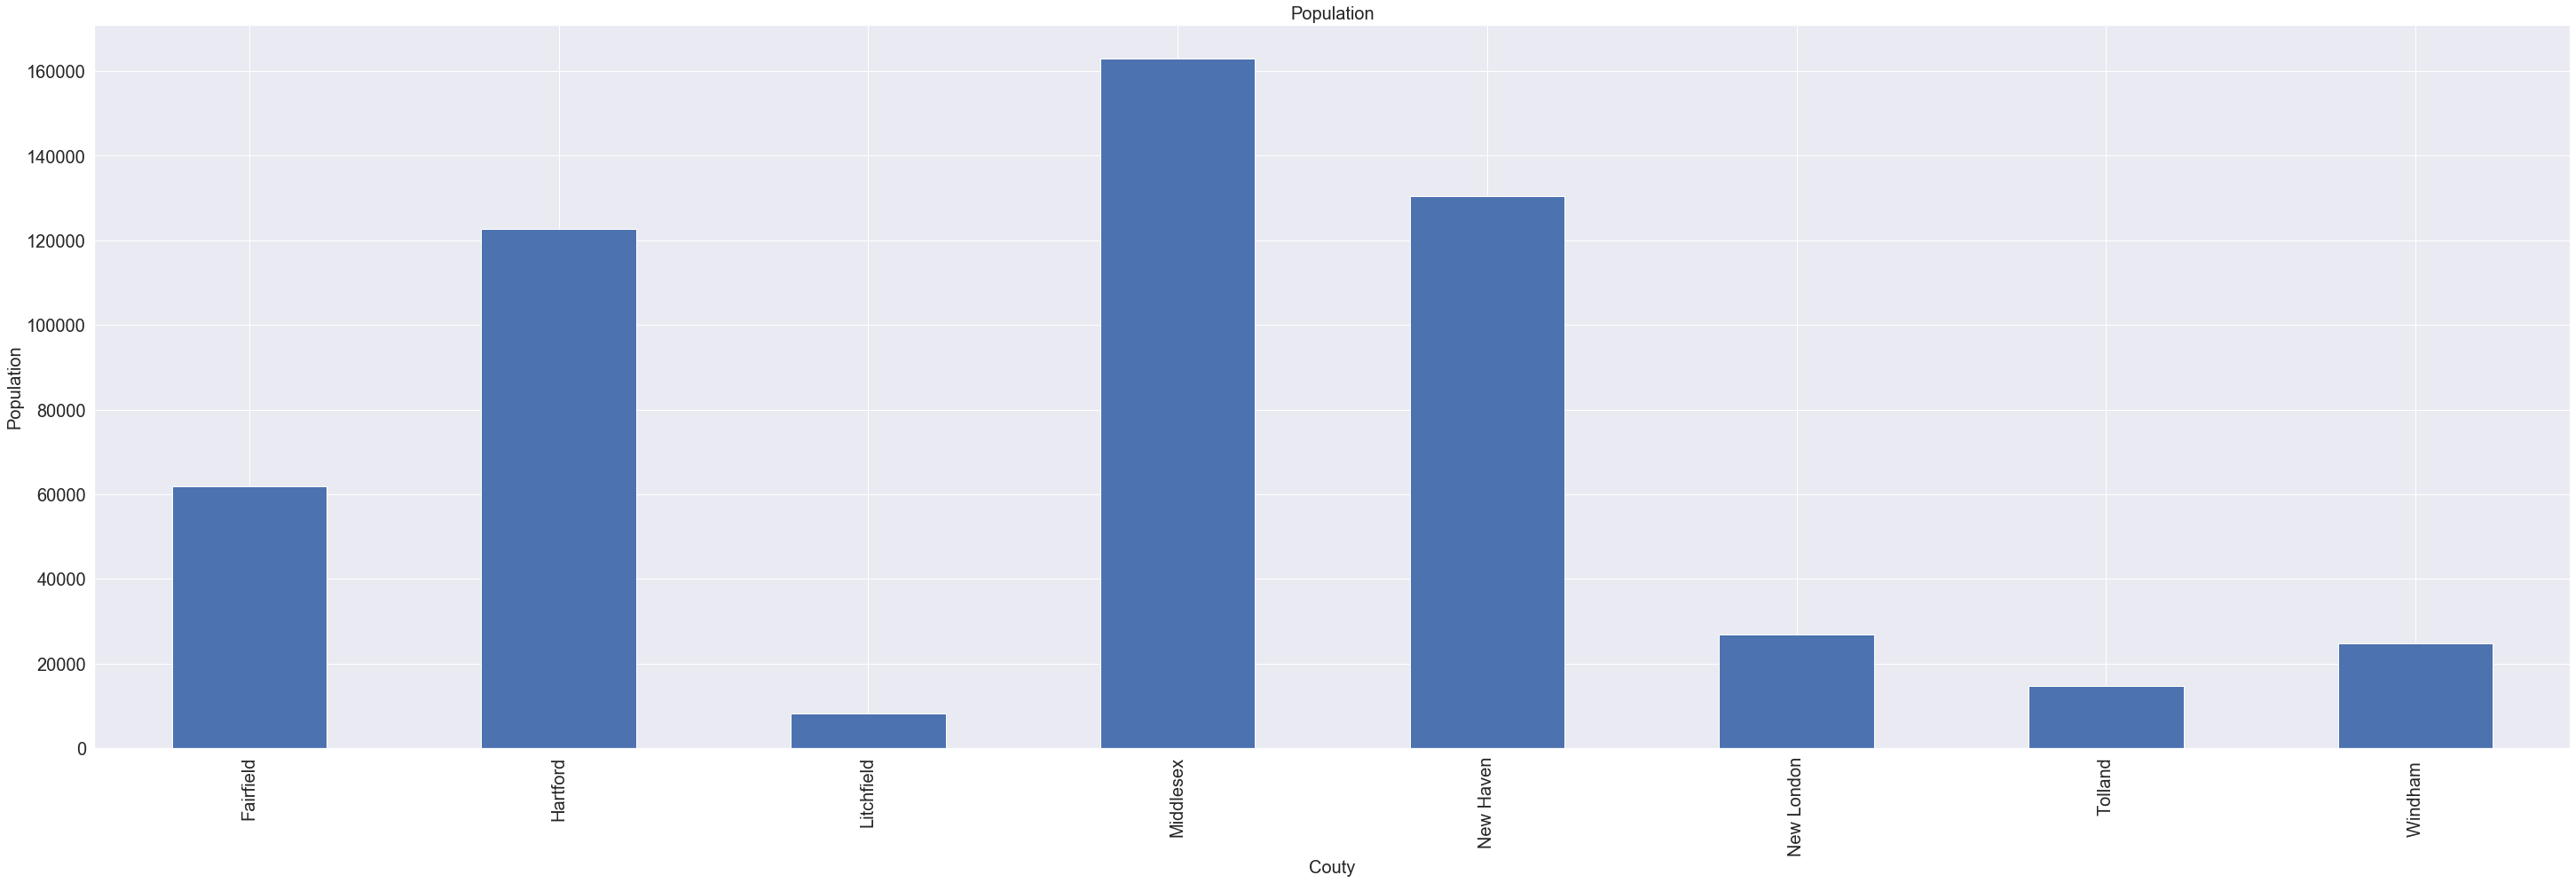

In [30]:
bigdata.groupby('County ')['Population of the county'].sum().plot(kind='bar',figsize=(50, 15), fontsize=20)
plt.xlabel('Couty', fontsize=20)
plt.ylabel('Population', fontsize=20)
plt.title('Population', fontsize=20)

**Conclusion:**  
36% people don't use any sought of insurance which should be a factor to worry about as it is a huge number when compared to the traditional method and there must be some measures taken inorder to help those people. 
I am glad to know that in comparison to the total patients admitted there is very less amount of patients that are less patients less than 35 years.
My assumption was that the place that has maximum number of population should have the maximum number of facities but I was proven wrong as hartford has the most number of facilities but middlesex has the most number of population